In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns

In [3]:
dataset=pd.read_csv('D:/DataSet.csv')
dataset.head(1)

,iyear,imonth,iday,country_txt,city,attacktype1_txt,targtype1_txt,corp1,target1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill,nwound,propextent_txt,ransomamt
0,2012,1,1,Kenya,Garissa,Armed Assault,Business,Locus Pub,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,Two grenades and AK-47 assault rifles were use...,3.0,14.0,Minor (likely < $1 million),NaN


Rename the columns

In [4]:
dataset.rename({'iyear':'year','imonth':'month','iday':'day','country_txt':'country','attacktype1_txt':'attack',\
             'targtype1_txt':'target', 'corp1':'target_inst', 'target1':'target_pop', 'natlty1_txt':'nationality',\
             'gname':'group','weaptype1_txt':'weapon_type', 'weapsubtype1_txt':'weapon_subtype', 'nkill':'kill', \
             'nwound':'wound','propextent_txt':'property_damg', 'ransomamt':'ransom'},axis='columns',inplace=True)

In [5]:
dataset['casualties'] = dataset['kill'] + dataset['wound']
dataset.head(1)

,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
0,2012,1,1,Kenya,Garissa,Armed Assault,Business,Locus Pub,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,Two grenades and AK-47 assault rifles were use...,3.0,14.0,Minor (likely < $1 million),NaN,17.0


__NEPAL__

In [6]:
Nepal=dataset[dataset['country']=='Nepal']

Terrorist Attacks in Nepal

Text(0.5, 1.0, 'BARPLOT : ATTACKS vs YEAR')

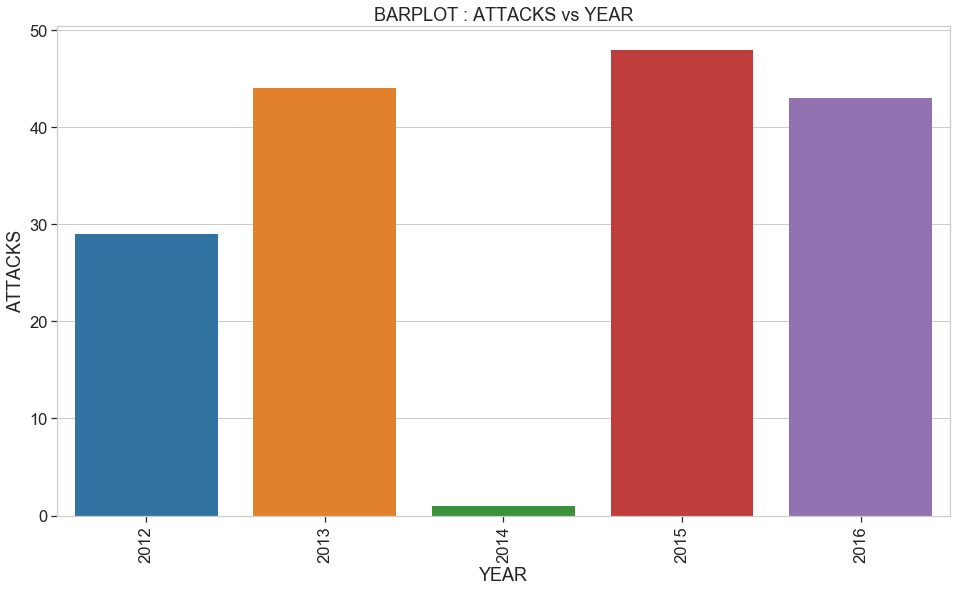

In [7]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
v1=Nepal['year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year':'attacks'}).sort_values(by='year')
sns.barplot(data=v1,x='year',y='attacks',ci=None)
plt.xticks(rotation=90)
plt.xlabel('YEAR')
plt.ylabel('ATTACKS')
#plt.legend(loc=1)
plt.title("BARPLOT : ATTACKS vs YEAR")

Most active terrorist groups in nepal

Text(0.5, 1.0, 'GROUP vs CASUALTIES')

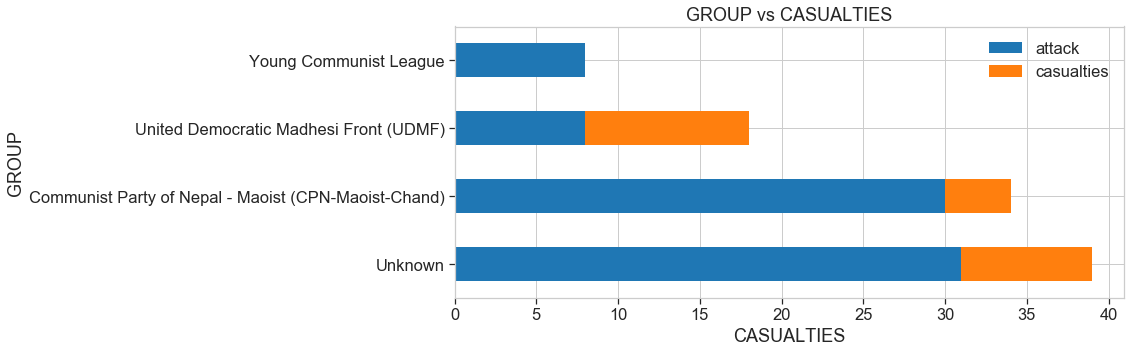

In [8]:
Nepal[Nepal['group'].isin(Nepal['group'].value_counts()[1:5].index)][['casualties','group']].groupby('group')\
.sum().reset_index().merge(Nepal[Nepal['group'].isin(Nepal['group'].value_counts()[1:5].index)]\
['group'].value_counts().to_frame().reset_index().rename(columns={'index':'group','group':'attack'}),\
on='group').sort_values(by='attack',ascending=False).plot.barh(x='group',y=['attack','casualties']\
,figsize=(12,5),stacked=True,width=0.5)
plt.xlabel('CASUALTIES')
plt.ylabel('GROUP')
#plt.legend(loc=1)
plt.title("GROUP vs CASUALTIES")

Most affected city in nepal

Text(0, 0.5, 'attack')

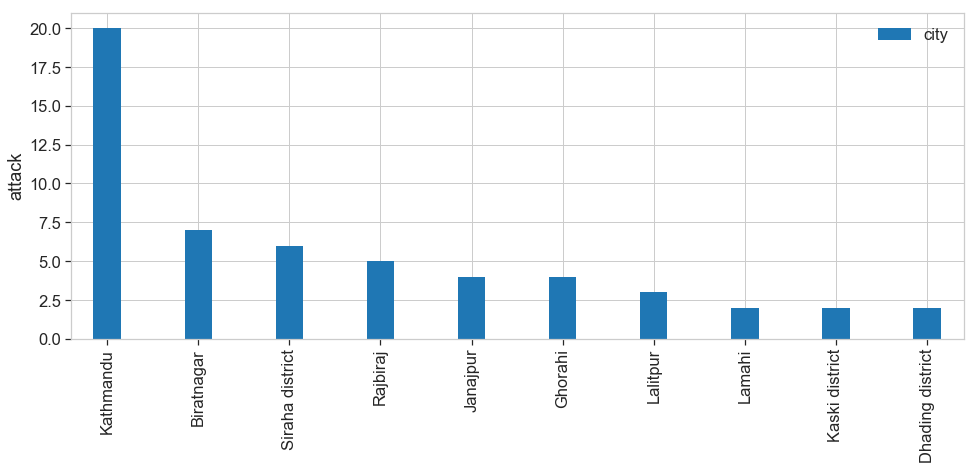

In [9]:
Nepal[Nepal['city'].isin(Nepal['city'].value_counts()[0:10].index)]['city'].value_counts().to_frame().plot.bar(figsize=(16,6),width=0.3)
plt.ylabel('attack')

Pie chart

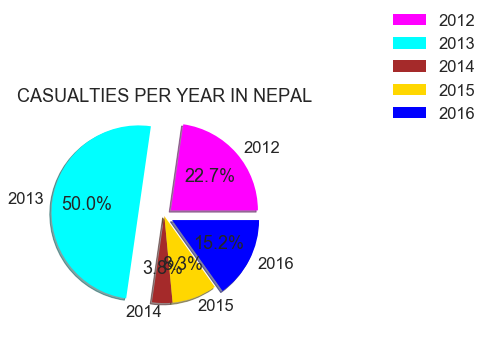

In [11]:
list1=np.unique(dataset["year"])
list2=list1.tolist()
a=np.zeros(len(list2))
j=0
for i in list2:
    a[j]=dataset[(dataset.country=="Nepal")&(dataset.year==i)][["casualties"]].sum()
    j+=1
slices=a.tolist()
cols=['magenta','cyan','brown','gold','blue']
plt.pie(slices,labels=list2,colors=cols,startangle=0,explode=(0.1,0.3,0,0,0.1),shadow=True,autopct='%.1f%%')
plt.title('CASUALTIES PER YEAR IN NEPAL')
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.0, 1.5, 0.5))
plt.show()

Fav target of different terrorist groups

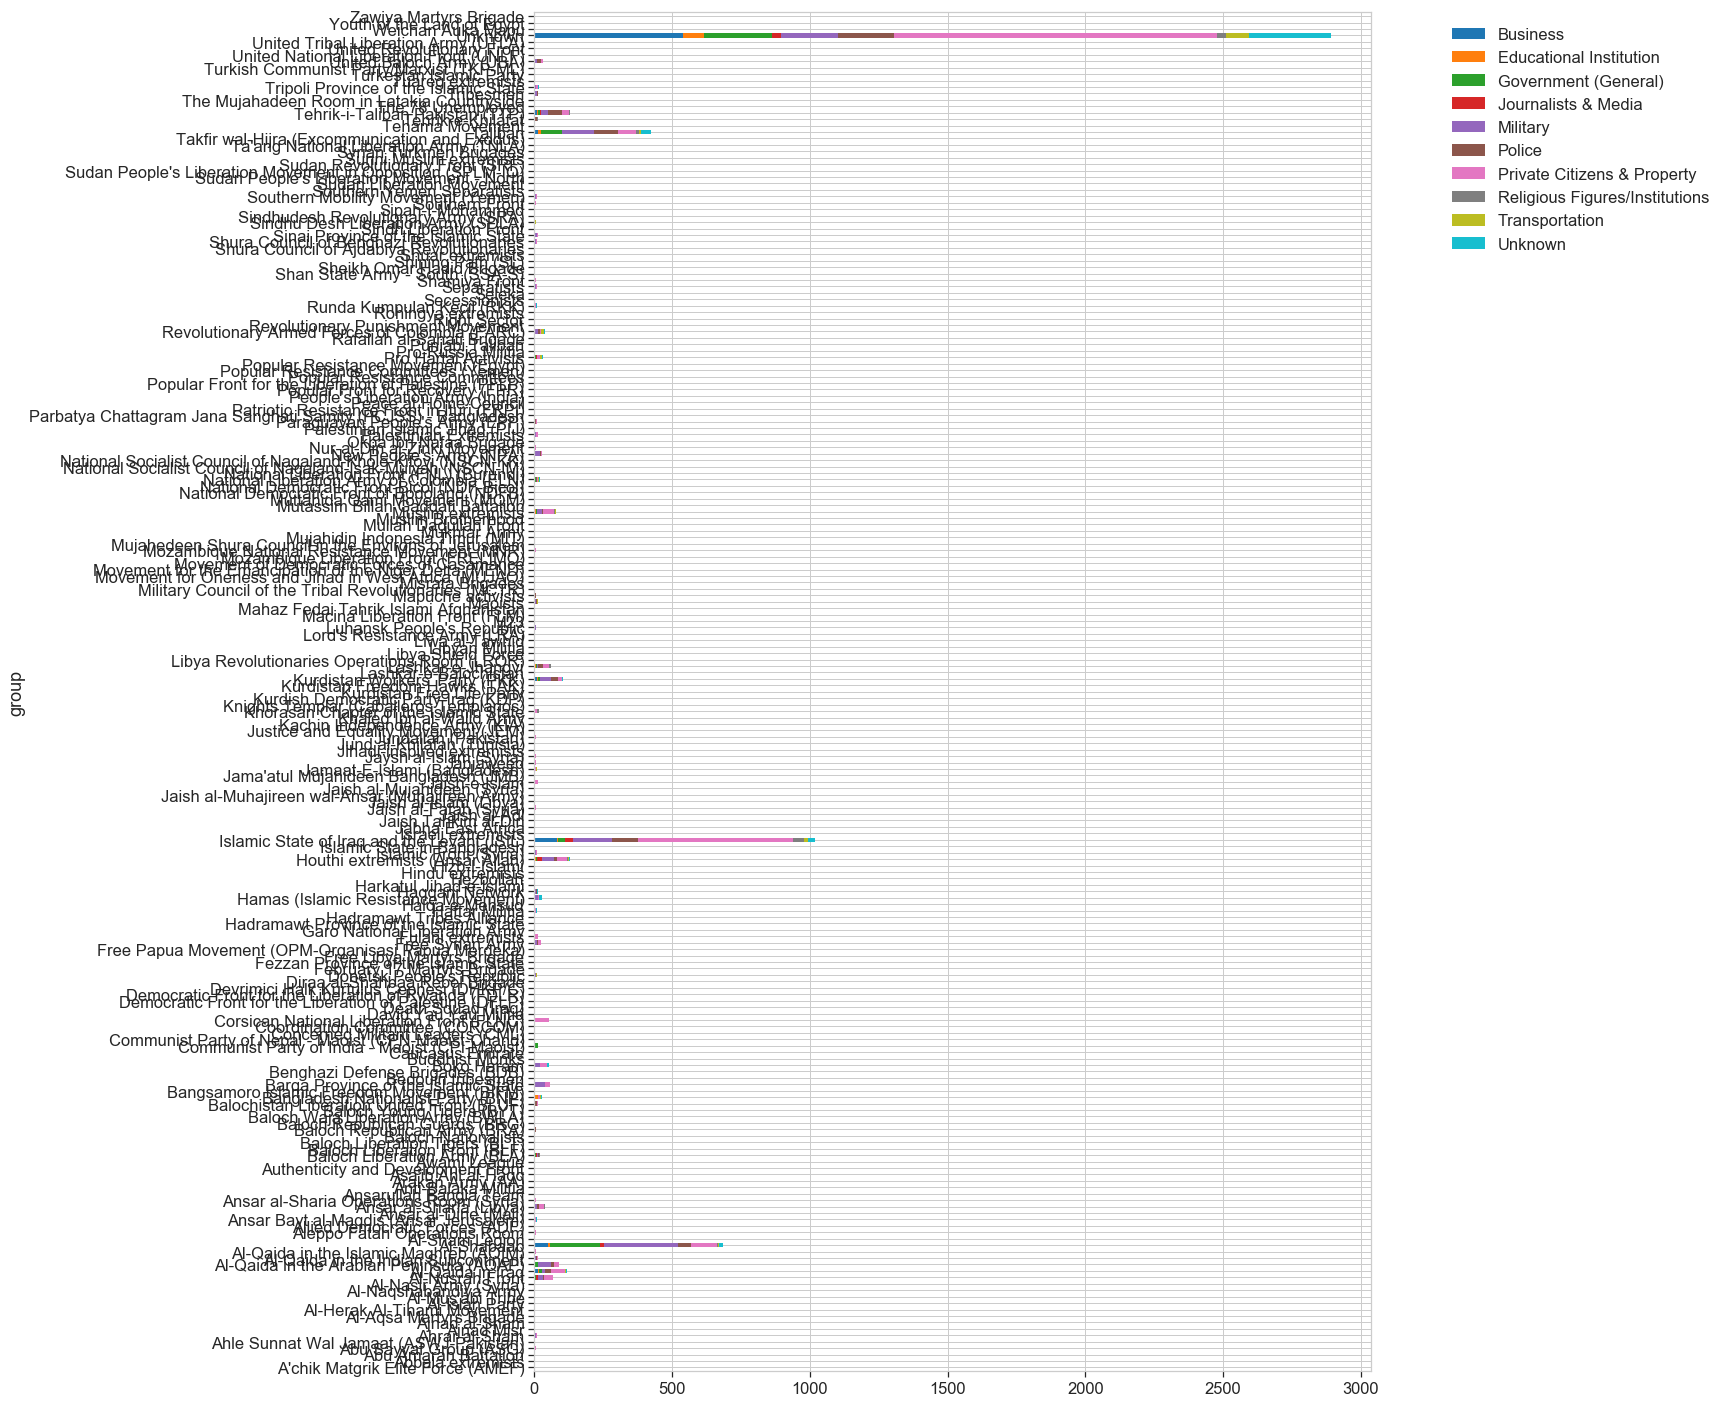

In [17]:
dataset=dataset[dataset['target'].isin(dataset['target'].value_counts()[0:10].index)]
pd.crosstab(dataset['group'],dataset['target']).plot.barh(stacked=True,figsize=(15,25),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1))

In [ ]:
#In the last graph it's showing for all the terrorist groups. How to convert it in only the activated groups in Nepal???